
# DS3010: Introduction to Machine Learning Lab – Week 4  
## **Cross-validation, Ridge Regression and Nonlinear Regression**  
**Name:** Parv Patel  
**Roll No:** 142301041  
**Lab:** Week 4 – Ridge and Nonlinear Regression  

---

### **Objective**
To understand the behavior of Ridge and Polynomial Regression models, visualize their fits for different degrees, and explore the effect of cross-validation and regularization parameters on performance.

---



## 1. Non-linear Regression

### 1(a) Generate 300 data points using y = sin(x) + ϵ  
where ϵ ∼ N(0, 0.5), and x is evenly spaced between 0 and 2π.


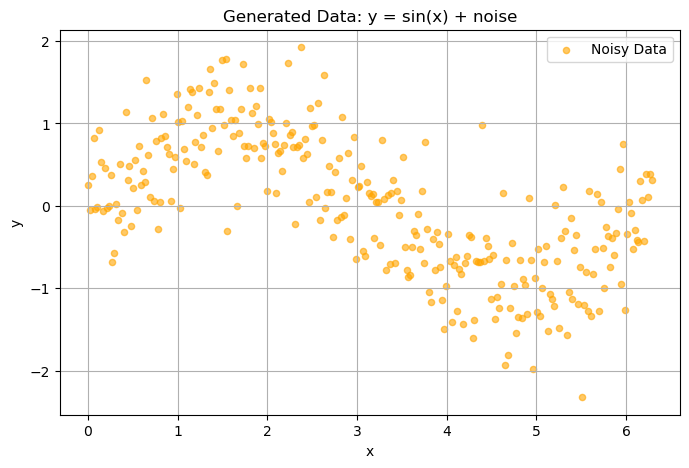

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Set seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 2 * np.pi, 300)
y = np.sin(x) + np.random.normal(0, 0.5, x.shape)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=20, alpha=0.6, label="Noisy Data", color="orange")
plt.title("Generated Data: y = sin(x) + noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



### 1(b) Fit a Ridge Regression model (α = 1)


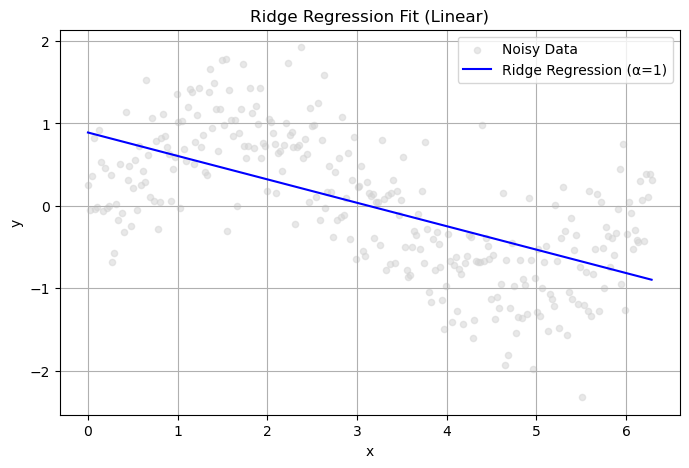

In [2]:

# Ridge regression with alpha=1 (using linear features only)
ridge_model = Ridge(alpha=1)
ridge_model.fit(x.reshape(-1, 1), y)
y_pred_ridge = ridge_model.predict(x.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=20, alpha=0.5, label='Noisy Data', color='lightgray')
plt.plot(x, y_pred_ridge, color='blue', label='Ridge Regression (α=1)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Regression Fit (Linear)")
plt.legend()
plt.grid(True)
plt.show()



### 1(c) Polynomial Regression (Degree = 3)


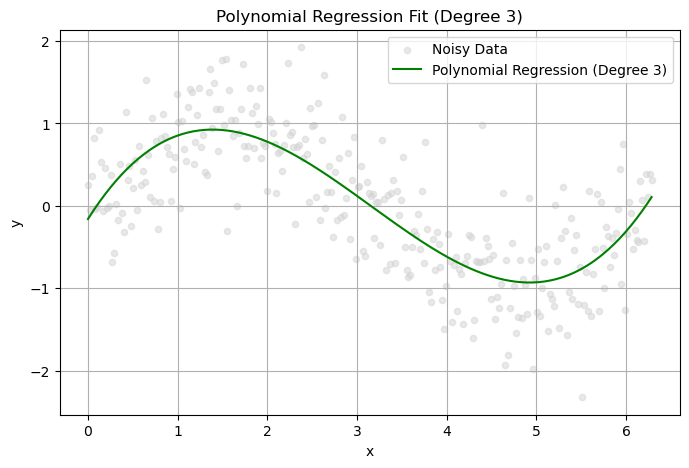

In [3]:

poly3_model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=1))
poly3_model.fit(x.reshape(-1, 1), y)
y_pred_poly3 = poly3_model.predict(x.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=20, alpha=0.5, label='Noisy Data', color='lightgray')
plt.plot(x, y_pred_poly3, color='green', label='Polynomial Regression (Degree 3)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Fit (Degree 3)")
plt.legend()
plt.grid(True)
plt.show()



### 1(d) Polynomial Regression (Degree = 30)


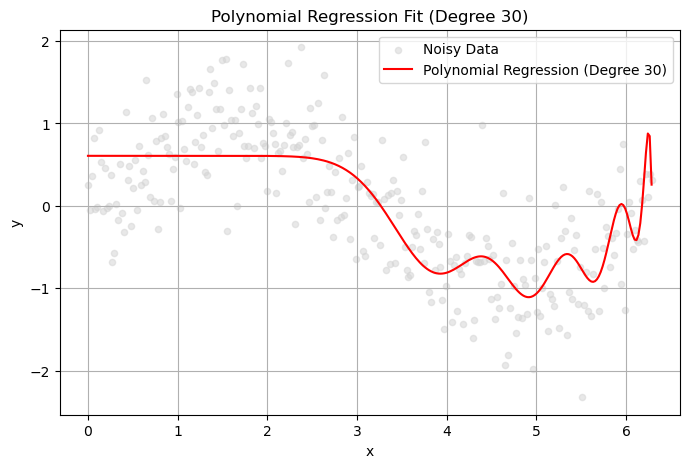

In [4]:

poly30_model = make_pipeline(PolynomialFeatures(30), Ridge(alpha=1))
poly30_model.fit(x.reshape(-1, 1), y)
y_pred_poly30 = poly30_model.predict(x.reshape(-1, 1))

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=20, alpha=0.5, label='Noisy Data', color='lightgray')
plt.plot(x, y_pred_poly30, color='red', label='Polynomial Regression (Degree 30)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression Fit (Degree 30)")
plt.legend()
plt.grid(True)
plt.show()



### 1(e) Combined Plot – Compare all models visually


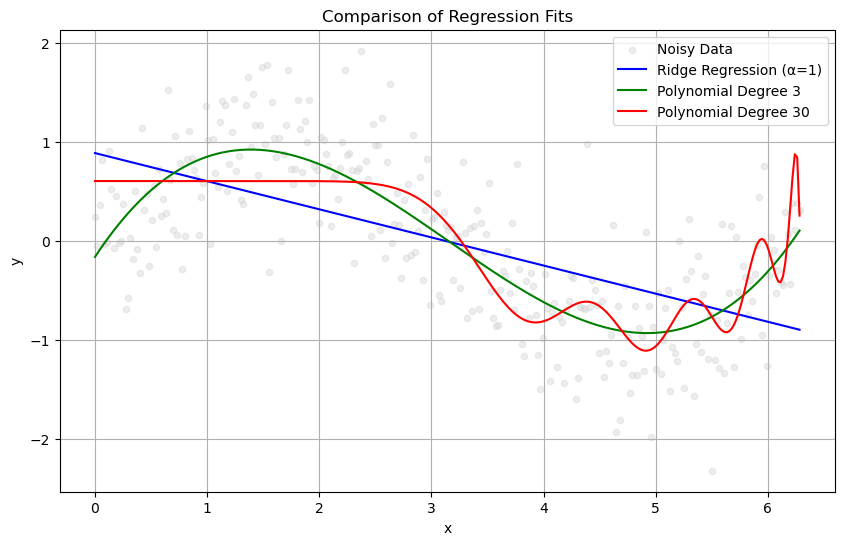

In [5]:

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, alpha=0.4, label='Noisy Data', color='lightgray')
plt.plot(x, y_pred_ridge, color='blue', label='Ridge Regression (α=1)')
plt.plot(x, y_pred_poly3, color='green', label='Polynomial Degree 3')
plt.plot(x, y_pred_poly30, color='red', label='Polynomial Degree 30')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Regression Fits")
plt.legend()
plt.grid(True)
plt.show()



### 1(f) Observations

- The **Ridge Regression (α=1)** produces a nearly linear fit and fails to capture the sinusoidal nature of data.  
- **Polynomial (Degree=3)** fits the general trend better, capturing curvature while maintaining smoothness.  
- **Polynomial (Degree=30)** overfits the noise, showing high variance and oscillations between data points.  
- Ridge regularization helps control overfitting, but extremely high-degree models still become unstable.

---



## 2. Multivariate Regression with Cross-validation

### 2(a) Generate 300 data points using y = sin(x) + z² + ϵ  
where x ∈ [0, 2π], z ∈ [−π, π], and ϵ ∼ N(0, 0.5).


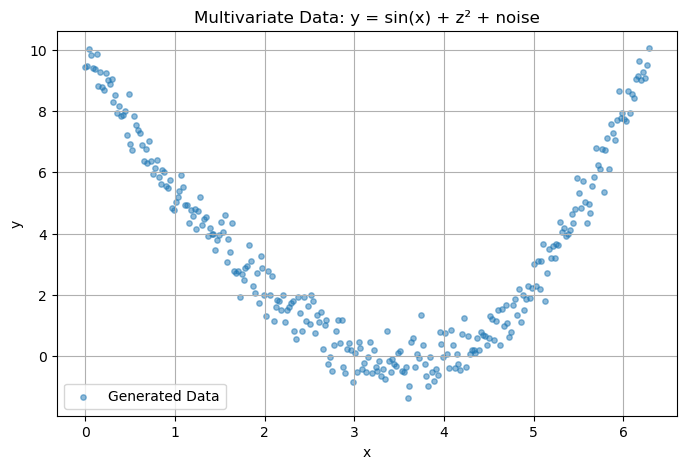

In [6]:

from sklearn.model_selection import train_test_split, cross_val_score

# Generate multivariate data
z = np.linspace(-np.pi, np.pi, 300)
X_multi = np.column_stack((x, z))
y_multi = np.sin(x) + z**2 + np.random.normal(0, 0.5, x.shape)

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 5))
plt.scatter(x, y_multi, s=15, alpha=0.5, label='Generated Data')
plt.title("Multivariate Data: y = sin(x) + z² + noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



### 2(b–d) Ridge Regression with Polynomial Features and Cross-Validation  
We test a range of α = [0.01, 0.1, 1, 10, 100] and polynomial degrees [1–10] using 5-fold cross-validation.  
The goal is to identify the best combination based on average validation R² score.


In [7]:

alphas = [0.01, 0.1, 1, 10, 100]
degrees = range(1, 11)

best_score = -np.inf
best_alpha = None
best_degree = None

for alpha in alphas:
    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
        avg_score = np.mean(scores)
        if avg_score > best_score:
            best_score = avg_score
            best_alpha = alpha
            best_degree = degree

print(f"Best α: {best_alpha}, Best Degree: {best_degree}, Best CV R²: {best_score:.4f}")


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=2.9115e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=3.95791e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.27177e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=4.15062e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:213: Lin

Best α: 100, Best Degree: 6, Best CV R²: 0.9750



### 2(e) Train final model using best α and degree, compute MSE and R² on test set


In [8]:

from sklearn.metrics import mean_squared_error, r2_score

best_model = make_pipeline(PolynomialFeatures(best_degree), Ridge(alpha=best_alpha))
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on Test Set: {mse:.4f}")
print(f"R² on Test Set: {r2:.4f}")


MSE on Test Set: 0.2422
R² on Test Set: 0.9725



### 2(f) Discussion and Analysis

- **Alpha (λ)** controls regularization strength — higher α penalizes large coefficients, preventing overfitting.  
- **Polynomial Degree** controls model complexity — low degrees underfit, high degrees overfit.  
- **Cross-validation** ensures generalization by testing model stability on unseen folds.  
- The optimal (α, degree) pair balances bias and variance, providing good predictive performance.  
- Ridge regularization stabilizes high-degree polynomial regression by reducing coefficient variance.

---
